# Multiple Linear Regression - By Saravanakumar PERUMAL
## Demand for shared bikes - Case Study

#### Problem Statement:
This assignment is a programming assignment wherein you have to build a multiple linear regression model for the prediction of demand for shared bikes																																					
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free																																					
Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

	
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic.																																							
The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 																																							
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19.																																							
They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.																																							
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:																																							
	    Which variables are significant in predicting the demand for shared bikes.																
	    How well those variables describe the bike demands																																						
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors																																							
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new maparation:																																							


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the shared bikes data set

In [68]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [69]:
import numpy as np
import pandas as pd

In [70]:
bikes = pd.read_csv("day.csv")

In [71]:
# Check the head of the dataset
bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [72]:
bikes.shape

(730, 16)

In [73]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [74]:
bikes.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising all Variables

Let's make a pairplot of all the variables

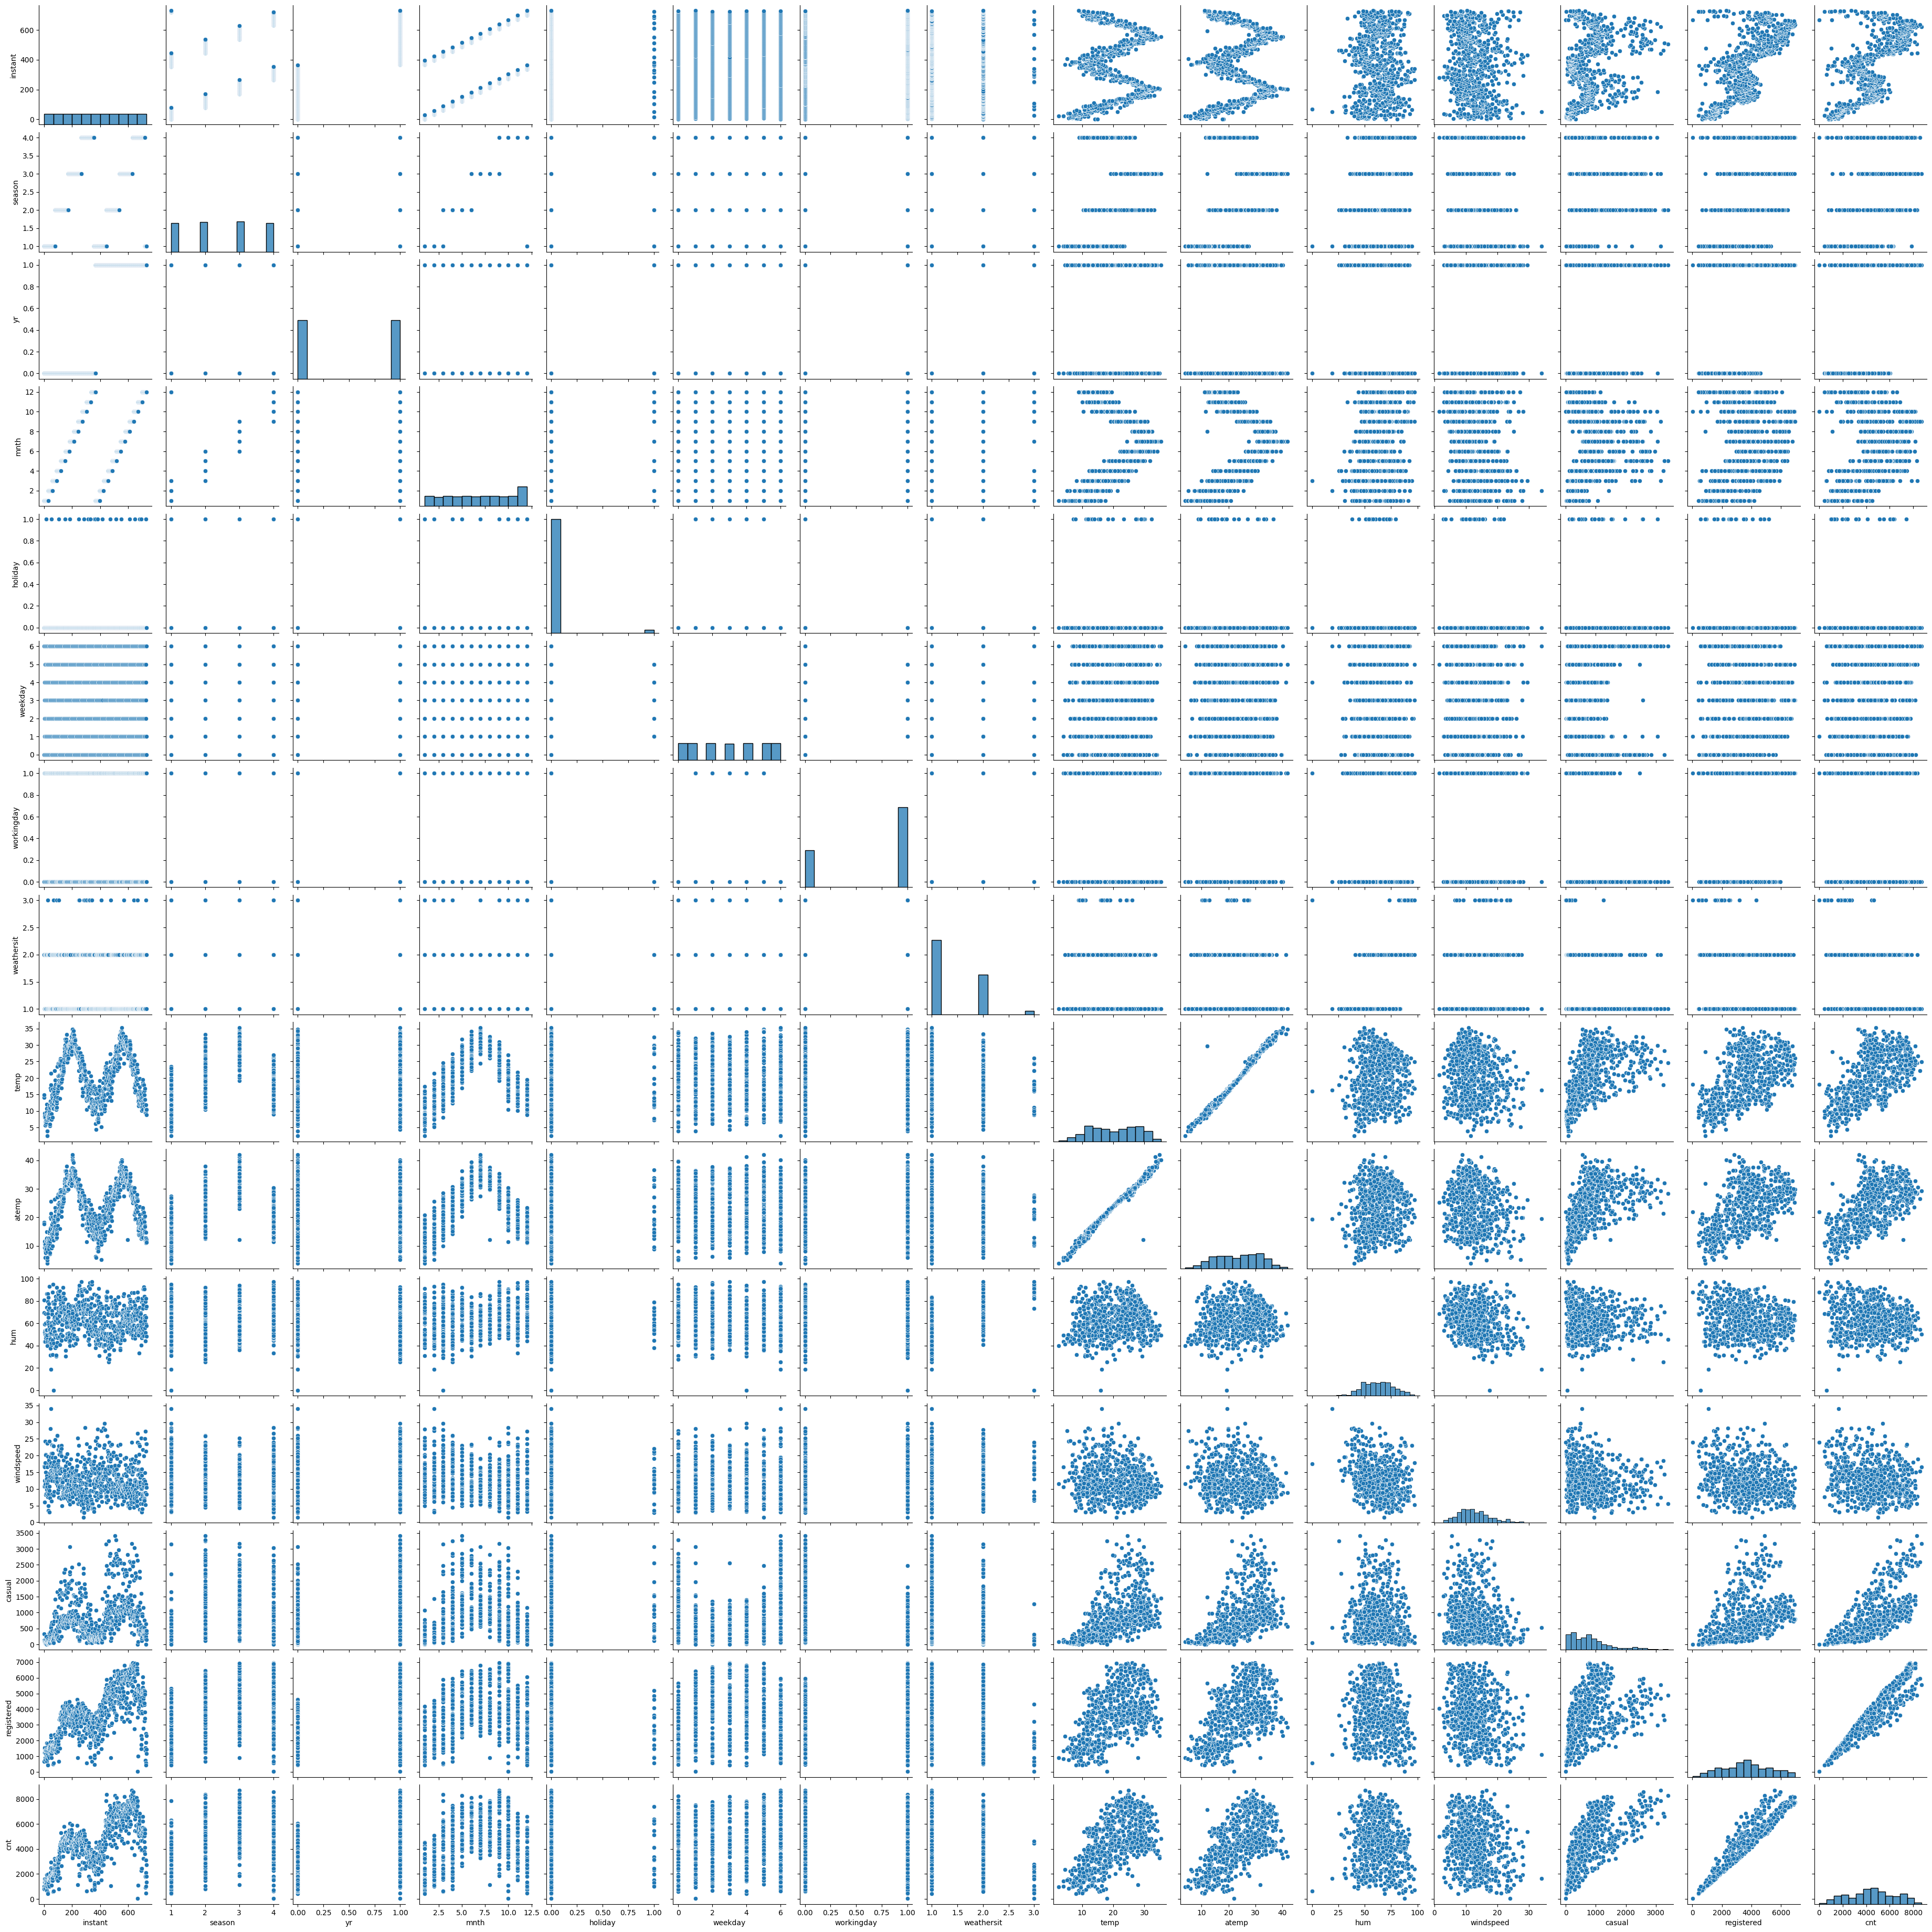

In [76]:
sns.pairplot(bikes)
plt.show()

### Remove output variables "casual" and "registered"

"casual" and "registered" are part of output variable and if it presents then the 
R-squared:	1.000 and 
Adj. R-squared:	1.000 will be 1.0 hence it should be removed before further analysis.s

In [77]:
#"casual" and "registered" are not part of input feature
bikes = bikes.drop(["casual","registered"], axis='columns')
bikes.head()


instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed   cnt  
0           2  14.110847  18.18125  80.5833  10.749882   985  
1           2  14.902598  17.68695  69.6087  16.652113   801  
2           1   8.050924   9.47025  43.7273  16.636703  1349  
3           1   8.200000  10.60610  59.0435  10.739832  1562  
4           1   9.305237  11.46350  43.6957  12.522300  1600

In [78]:
### Dummy Variables
#The variable `season` has 4 levels. We need to convert these levels into integer as well. 
#For this, we will use something called `dummy variables`.
# Get the dummy variables for the feature 'furnishingstatus' and store it in a new variable - 'status'
status = pd.get_dummies(bikes['season'])
# Check what the dataset 'status' looks like
status.colums = ["spring", "summer", "fall", "winter"]


#### Visualising Numeric Variables

Let's make a pairplot of all the numeric variables

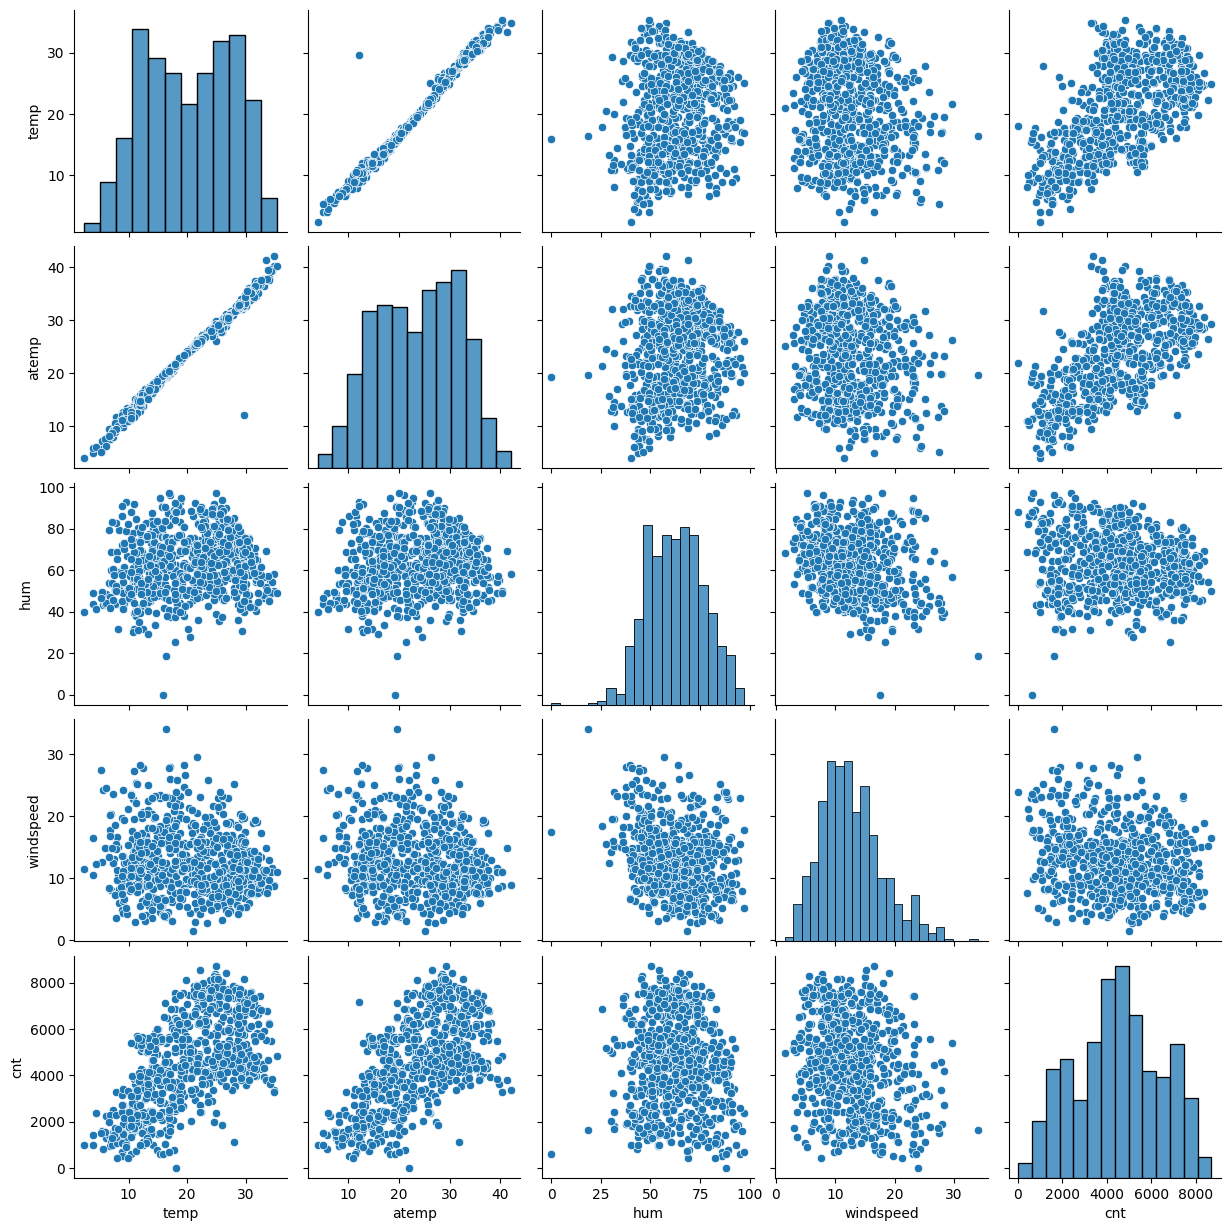

In [79]:
num_var = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(bikes[num_var])
plt.show()

### Observations of Numerical Variables
a) Temperature, humidity and windspeed are well distributed to the mean value
b) At high and low weather conditions (temp, windspeeed, humidity etc.) we observe less rides

#### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

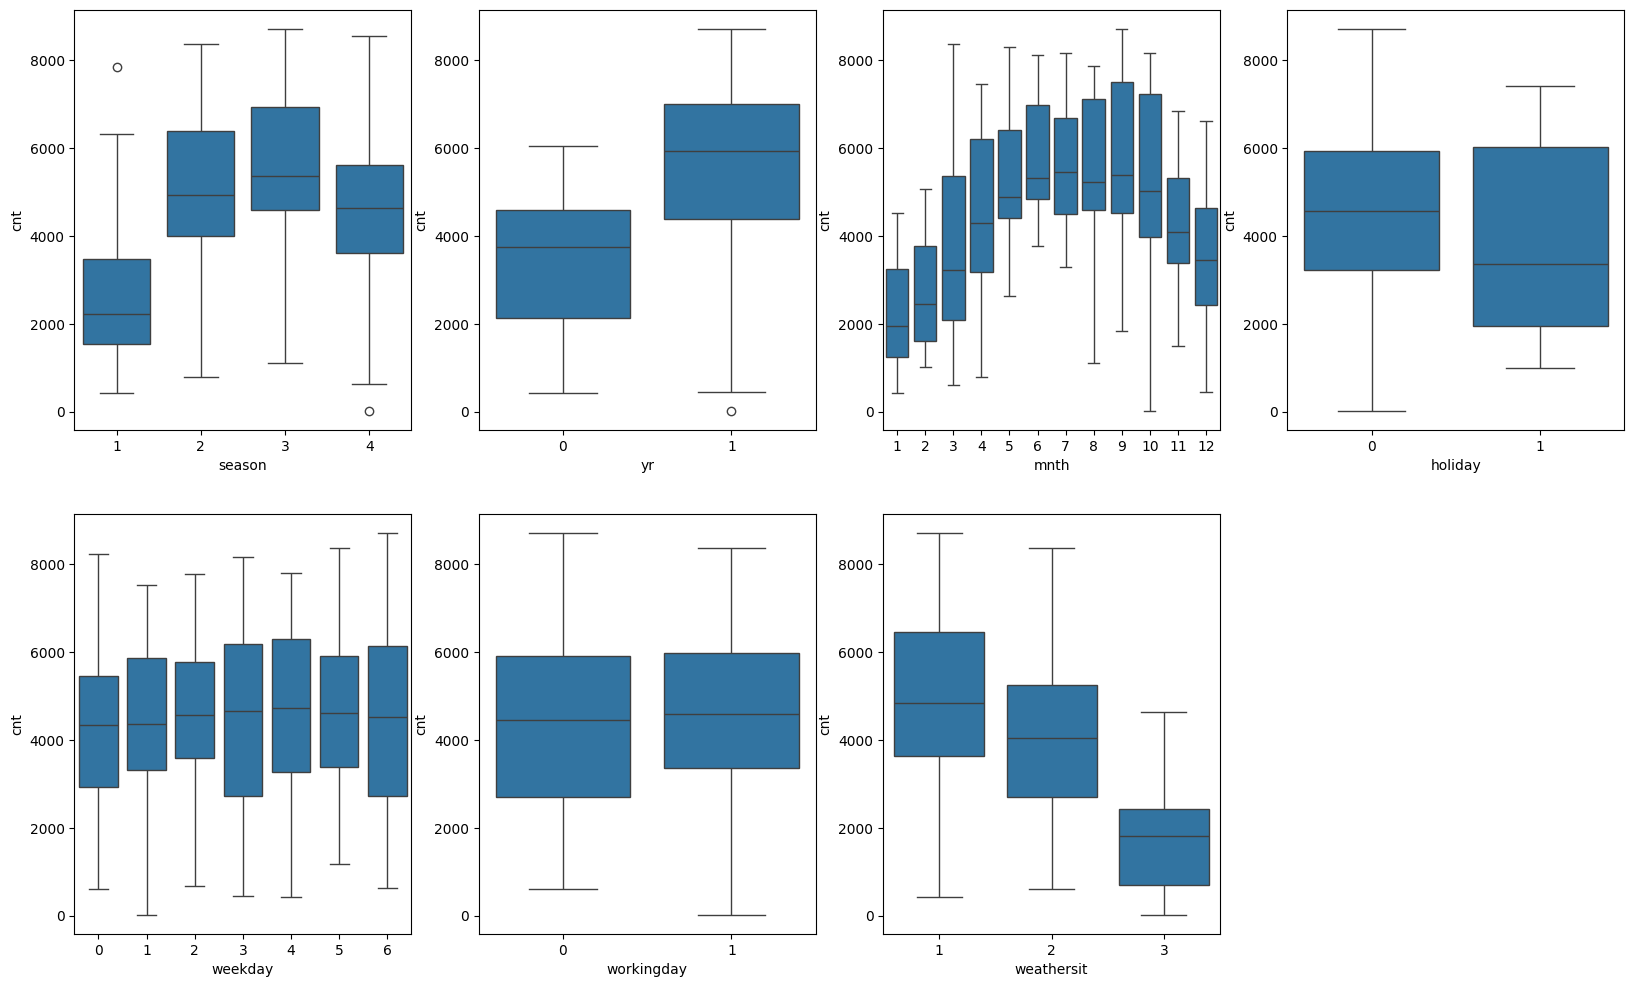

In [80]:
cat_var =['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20, 12))
num = 1;
for i in cat_var : 
    plt.subplot(2,4,num)
    sns.boxplot(x = i, y = 'cnt', data = bikes)
    num = num+1
plt.show()


#### Observations of Categorical Variable:
a) If we observe during seasons (1:spring, 2:summer, 3:fall, 4:winter
 during summer (2 & 3) the ride count is hih.


b) 2019 the rides were more as it gets popularity over time from the previous year (2018). This would infer that the next year (2020) the company can expect more rides compared to 201

.
c) Months also shows similar pattern like season as during summer and holiday months like May, June and July rides were more and during winter and snow period there are less ri
des
d) During Holidays the rides were less and during working days the rides were m
re

e)  During weekday does not shows any significant changes in the p

ttern
f) Similarly working day rides were less as it is already shows in 

oliday
g) “Weather sit” is plays important role, as we have observed like in season and month, Clear sky contributes more rides compared to cloudy and snow.


In [81]:
bikes.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed   cnt  
0           2  14.110847  18.18125  80.5833  10.749882   985  
1           2  14.902598  17.68695  69.6087  16.652113   801  
2           1   8.050924   9.47025  43.7273  16.636703  1349  
3           1   8.200000  10.60610  59.0435  10.739832  1562  
4           1   9.305237  11.46350  43.6957  12.522300  1600

#### Dropping unwanted columns "instant" Column name  and "dteday" Date coulumn

In [82]:
bikes.drop(['instant'], axis = 1, inplace = True)
bikes.drop(['dteday'], axis = 1, inplace = True)

In [83]:
bikes.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  
0  18.18125  80.5833  10.749882   985  
1  17.68695  69.6087  16.652113   801  
2   9.47025  43.7273  16.636703  1349  
3  10.60610  59.0435  10.739832  1562  
4  11.46350  43.6957  12.522300  1600

In [84]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [85]:
bikes.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     2.498630    0.500000    6.526027    0.028767    2.997260    0.683562   
std      1.110184    0.500343    3.450215    0.167266    2.006161    0.465405   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    4.000000    0.000000    1.000000    0.000000   
50%      3.000000    0.500000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed          cnt  
count  730.000000  730.000000  730.000000  730.000000  730.000000   730.000000  
mean     1.394521   20.319259   23.726322   62.765175   12.763620  4508.006849  
std      0.544807    7.506729    8.150308   14.237589    5.195841  1936.011647  
min      1.000000    2.424346    3.953480    0.000000    1.500244    22.000000  
25%      1.000000   13.811885   16.889713   52.000000    9.041650  3169.750000  
50%      1.000000   20.465826   24.368225   62.625000   12.125325  4548.500000  
75%      2.000000   26.880615   30.445775   72.989575   15.625589  5966.000000  
max      3.000000   35.328347   42.044800   97.250000   34.000021  8714.000000

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [86]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescaling the FeaturesFor multiple linear regression  scalingis very important as you can see the mean varies for each feature so we need to scale the feature between 0 and 1 . If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

Min-Max scal -- We use this as it takes care of outliers.i
Standardisation (mean-0, sigma-1 is not used.)Wtime, we will use MinMax scaling.

In [87]:
print(type(df_train))
df_train.describe()

<class 'pandas.core.frame.DataFrame'>


season          yr        mnth     holiday     weekday  workingday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     2.517647    0.507843    6.549020    0.025490    2.990196    0.676471   
std      1.111947    0.500429    3.468714    0.157763    2.017093    0.468282   
min      1.000000    0.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    0.000000    3.000000    0.000000    1.000000    0.000000   
50%      3.000000    1.000000    7.000000    0.000000    3.000000    1.000000   
75%      3.000000    1.000000   10.000000    0.000000    5.000000    1.000000   
max      4.000000    1.000000   12.000000    1.000000    6.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed          cnt  
count  510.000000  510.000000  510.000000  510.000000  510.000000   510.000000  
mean     1.401961   20.102429   23.493909   63.112926   12.831318  4486.382353  
std      0.547540    7.431169    8.090038   14.156632    5.291832  1952.158739  
min      1.000000    2.424346    3.953480    0.000000    2.834381    22.000000  
25%      1.000000   13.606865   16.603063   52.270825    9.041918  3120.000000  
50%      1.000000   20.209597   24.020400   63.437500   12.083182  4530.000000  
75%      2.000000   26.615847   30.177700   73.250025   15.750879  5973.500000  
max      3.000000   35.328347   42.044800   97.041700   34.000021  8714.000000

In [88]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [89]:
#create Min Max Scaler except for the variables 1) yr, 2) holiday, 3) workingday as these were already 0 (or) 1
scale_vars = ['season','mnth','weekday','weathersit','temp','atemp','hum','windspeed','cnt']
df_train[df_train.columns] = scaler.fit_transform(df_train[df_train.columns])
df_train.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.505882    0.507843    0.504456    0.025490    0.498366    0.676471   
std      0.370649    0.500429    0.315338    0.157763    0.336182    0.468282   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.333333    0.000000    0.181818    0.000000    0.166667    0.000000   
50%      0.666667    1.000000    0.545455    0.000000    0.500000    1.000000   
75%      0.666667    1.000000    0.818182    0.000000    0.833333    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed         cnt  
count   510.00000  510.000000  510.000000  510.000000  510.000000  510.000000  
mean      0.20098    0.537262    0.512989    0.650369    0.320768    0.513620  
std       0.27377    0.225844    0.212385    0.145882    0.169797    0.224593  
min       0.00000    0.000000    0.000000    0.000000    0.000000    0.000000  
25%       0.00000    0.339853    0.332086    0.538643    0.199179    0.356420  
50%       0.00000    0.540519    0.526811    0.653714    0.296763    0.518638  
75%       0.50000    0.735215    0.688457    0.754830    0.414447    0.684710  
max       1.00000    1.000000    1.000000    1.000000    1.000000    1.000000

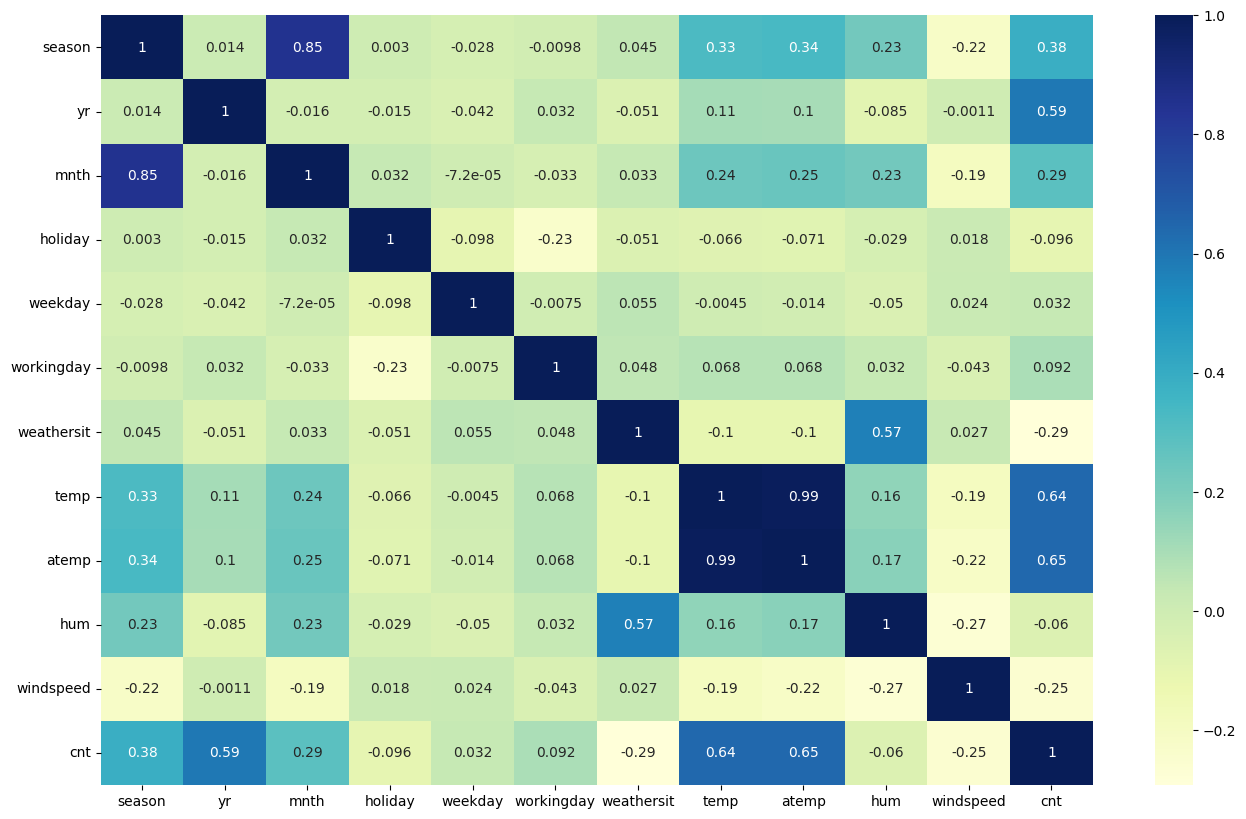

In [90]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Creating X_train and y_train

In [91]:
y_train = df_train.pop('cnt')
X_train = df_train

### Importing RFE and LinearRegression from SKLearn

In [92]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season', False, 2),
 ('yr', True, 1),
 ('mnth', False, 7),
 ('holiday', False, 4),
 ('weekday', False, 5),
 ('workingday', False, 6),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', False, 3),
 ('windspeed', True, 1)]

In [93]:
print(lm.intercept_)
print(lm.coef_)

0.18088388325019694
[ 0.14437708  0.23462137 -0.01777527 -0.06885221  0.04784187  0.01931717
 -0.16190187  0.21711504  0.27632519 -0.09385382 -0.15731634]


### Adding all the variables to the model

In [94]:
X_train.head()

season   yr      mnth  holiday   weekday  workingday  weathersit  \
653  1.000000  1.0  0.818182      0.0  0.333333         1.0         0.0   
576  0.666667  1.0  0.545455      0.0  0.333333         1.0         0.0   
426  0.000000  1.0  0.181818      0.0  1.000000         0.0         0.5   
728  0.000000  1.0  1.000000      0.0  0.000000         0.0         0.0   
482  0.333333  1.0  0.272727      0.0  1.000000         0.0         0.5   

         temp     atemp       hum  windspeed  
653  0.509887  0.501133  0.575354   0.300794  
576  0.815169  0.766351  0.725633   0.264686  
426  0.442393  0.438975  0.640189   0.255342  
728  0.245101  0.200348  0.498067   0.663106  
482  0.395666  0.391735  0.504508   0.188475

In [95]:
X_train.shape

(510, 11)

In [96]:
X_train.head()

season   yr      mnth  holiday   weekday  workingday  weathersit  \
653  1.000000  1.0  0.818182      0.0  0.333333         1.0         0.0   
576  0.666667  1.0  0.545455      0.0  0.333333         1.0         0.0   
426  0.000000  1.0  0.181818      0.0  1.000000         0.0         0.5   
728  0.000000  1.0  1.000000      0.0  0.000000         0.0         0.0   
482  0.333333  1.0  0.272727      0.0  1.000000         0.0         0.5   

         temp     atemp       hum  windspeed  
653  0.509887  0.501133  0.575354   0.300794  
576  0.815169  0.766351  0.725633   0.264686  
426  0.442393  0.438975  0.640189   0.255342  
728  0.245101  0.200348  0.498067   0.663106  
482  0.395666  0.391735  0.504508   0.188475

In [97]:
y_train.shape

(510,)

In [98]:
import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const         0.180884
season        0.144377
yr            0.234621
mnth         -0.017775
holiday      -0.068852
weekday       0.047842
workingday    0.019317
weathersit   -0.161902
temp          0.217115
atemp         0.276325
hum          -0.093854
windspeed    -0.157316
dtype: float64

In [99]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     187.3
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          4.96e-169
Time:                        10:52:06   Log-Likelihood:                 455.82
No. Observations:                 510   AIC:                            -887.6
Df Residuals:                     498   BIC:                            -836.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1809      0.032      5.659      0.000       0.118       0.244
season         0.1444      0.024      6.066      0.000       0.098       0.191
yr             0.2346      0.009     26.083      0.000       0.217       0.252
mnth          -0.0178      0.027     -0.652      0.515      -0.071       0.036
holiday       -0.0689      0.029     -2.355      0.019      -0.126      -0.011
weekday        0.0478      0.013      3.562      0.000       0.021       0.074
workingday     0.0193      0.010      1.971      0.049    5.95e-05       0.039
weathersit    -0.1619      0.021     -7.717      0.000      -0.203      -0.121
temp           0.2171      0.139      1.560      0.119      -0.056       0.491
atemp          0.2763      0.149      1.850      0.065      -0.017       0.570
hum           -0.0939      0.041     -2.264      0.024      -0.175      -0.012
windspeed     -0.1573      0.029     -5.487      0.000      -0.214      -0.101
==============================================================================
Omnibus:                       64.012   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.857
Skew:                          -0.673   Prob(JB):                     1.29e-32
Kurtosis:                       5.258   Cond. No.                         88.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [100]:
y_train

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
         ...   
526    0.764151
578    0.832835
53     0.218017
350    0.312586
79     0.236424
Name: cnt, Length: 510, dtype: float64

In [101]:
X_train_lm

const    season   yr      mnth  holiday   weekday  workingday  \
653    1.0  1.000000  1.0  0.818182      0.0  0.333333         1.0   
576    1.0  0.666667  1.0  0.545455      0.0  0.333333         1.0   
426    1.0  0.000000  1.0  0.181818      0.0  1.000000         0.0   
728    1.0  0.000000  1.0  1.000000      0.0  0.000000         0.0   
482    1.0  0.333333  1.0  0.272727      0.0  1.000000         0.0   
..     ...       ...  ...       ...      ...       ...         ...   
526    1.0  0.333333  1.0  0.454545      0.0  0.166667         1.0   
578    1.0  0.666667  1.0  0.636364      0.0  0.666667         1.0   
53     1.0  0.000000  0.0  0.090909      0.0  0.500000         1.0   
350    1.0  1.000000  0.0  1.000000      0.0  1.000000         0.0   
79     1.0  0.333333  0.0  0.181818      0.0  0.166667         1.0   

     weathersit      temp     atemp       hum  windspeed  
653         0.0  0.509887  0.501133  0.575354   0.300794  
576         0.0  0.815169  0.766351  0.725633   0.264686  
426         0.5  0.442393  0.438975  0.640189   0.255342  
728         0.0  0.245101  0.200348  0.498067   0.663106  
482         0.5  0.395666  0.391735  0.504508   0.188475  
..          ...       ...       ...       ...        ...  
526         0.5  0.824514  0.762183  0.605840   0.355596  
578         0.0  0.863973  0.824359  0.679690   0.187140  
53          0.0  0.202618  0.218747  0.435939   0.111379  
350         0.5  0.248216  0.223544  0.577930   0.431816  
79          0.5  0.462664  0.434043  0.759870   0.529881  

[510 rows x 12 columns]

## RFE (Recurrsive Feature Elemination) Method by both P-Value and VIF 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [102]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
8        atemp  346.98
7         temp  333.20
9          hum   16.09
2         mnth   13.32
0       season   11.30
10   windspeed    3.74
5   workingday    3.14
4      weekday    3.03
6   weathersit    2.19
1           yr    2.01
3      holiday    1.09

We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

### Dropping the Variable and Updating the Model


In [104]:
# Dropping highly correlated variables and insignificant variables
X = X_train

In [105]:
X.head()

season   yr      mnth  holiday   weekday  workingday  weathersit  \
653  1.000000  1.0  0.818182      0.0  0.333333         1.0         0.0   
576  0.666667  1.0  0.545455      0.0  0.333333         1.0         0.0   
426  0.000000  1.0  0.181818      0.0  1.000000         0.0         0.5   
728  0.000000  1.0  1.000000      0.0  0.000000         0.0         0.0   
482  0.333333  1.0  0.272727      0.0  1.000000         0.0         0.5   

         temp     atemp       hum  windspeed  
653  0.509887  0.501133  0.575354   0.300794  
576  0.815169  0.766351  0.725633   0.264686  
426  0.442393  0.438975  0.640189   0.255342  
728  0.245101  0.200348  0.498067   0.663106  
482  0.395666  0.391735  0.504508   0.188475

In [106]:
X.pop('atemp')


653    0.501133
576    0.766351
426    0.438975
728    0.200348
482    0.391735
         ...   
526    0.762183
578    0.824359
53     0.218747
350    0.223544
79     0.434043
Name: atemp, Length: 510, dtype: float64

In [107]:
X.head()

season   yr      mnth  holiday   weekday  workingday  weathersit  \
653  1.000000  1.0  0.818182      0.0  0.333333         1.0         0.0   
576  0.666667  1.0  0.545455      0.0  0.333333         1.0         0.0   
426  0.000000  1.0  0.181818      0.0  1.000000         0.0         0.5   
728  0.000000  1.0  1.000000      0.0  0.000000         0.0         0.0   
482  0.333333  1.0  0.272727      0.0  1.000000         0.0         0.5   

         temp       hum  windspeed  
653  0.509887  0.575354   0.300794  
576  0.815169  0.725633   0.264686  
426  0.442393  0.640189   0.255342  
728  0.245101  0.498067   0.663106  
482  0.395666  0.504508   0.188475

In [108]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

In [109]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.84e-169
Time:                        10:52:06   Log-Likelihood:                 454.07
No. Observations:                 510   AIC:                            -886.1
Df Residuals:                     499   BIC:                            -839.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1858      0.032      5.820      0.000       0.123       0.249
season         0.1456      0.024      6.107      0.000       0.099       0.192
yr             0.2345      0.009     26.011      0.000       0.217       0.252
mnth          -0.0180      0.027     -0.659      0.510      -0.072       0.036
holiday       -0.0713      0.029     -2.434      0.015      -0.129      -0.014
weekday        0.0465      0.013      3.456      0.001       0.020       0.073
workingday     0.0192      0.010      1.952      0.051      -0.000       0.038
weathersit    -0.1644      0.021     -7.834      0.000      -0.206      -0.123
temp           0.4714      0.022     21.582      0.000       0.428       0.514
hum           -0.0878      0.041     -2.120      0.034      -0.169      -0.006
windspeed     -0.1662      0.028     -5.868      0.000      -0.222      -0.111
==============================================================================
Omnibus:                       57.074   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              127.433
Skew:                          -0.613   Prob(JB):                     2.13e-28
Kurtosis:                       5.120   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [110]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
8         hum  15.29
2        mnth  13.32
0      season  11.30
7        temp   7.95
9   windspeed   3.66
5  workingday   3.14
4     weekday   3.03
6  weathersit   2.17
1          yr   2.01
3     holiday   1.09

In [111]:
X.pop('hum')
X_train_lm = sm.add_constant(X)
lr_2 = sm.OLS(y_train, X_train_lm).fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     225.4
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          1.11e-169
Time:                        10:52:06   Log-Likelihood:                 451.78
No. Observations:                 510   AIC:                            -883.6
Df Residuals:                     500   BIC:                            -841.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1333      0.020      6.603      0.000       0.094       0.173
season         0.1467      0.024      6.132      0.000       0.100       0.194
yr             0.2364      0.009     26.244      0.000       0.219       0.254
mnth          -0.0242      0.027     -0.888      0.375      -0.078       0.029
holiday       -0.0712      0.029     -2.422      0.016      -0.129      -0.013
weekday        0.0495      0.013      3.691      0.000       0.023       0.076
workingday     0.0195      0.010      1.975      0.049       0.000       0.039
weathersit    -0.1919      0.017    -11.599      0.000      -0.224      -0.159
temp           0.4627      0.022     21.492      0.000       0.420       0.505
windspeed     -0.1488      0.027     -5.470      0.000      -0.202      -0.095
==============================================================================
Omnibus:                       56.375   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              123.024
Skew:                          -0.613   Prob(JB):                     1.93e-27
Kurtosis:                       5.070   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
2        mnth  12.50
0      season  11.25
7        temp   5.82
8   windspeed   3.37
5  workingday   2.93
4     weekday   2.91
1          yr   2.00
6  weathersit   1.54
3     holiday   1.07

In [113]:
X.pop('mnth')
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     253.5
Date:                Tue, 30 Jul 2024   Prob (F-statistic):          9.98e-171
Time:                        10:52:06   Log-Likelihood:                 451.38
No. Observations:                 510   AIC:                            -884.8
Df Residuals:                     501   BIC:                            -846.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1291      0.020      6.578      0.000       0.091       0.168
season         0.1289      0.013      9.905      0.000       0.103       0.154
yr             0.2367      0.009     26.311      0.000       0.219       0.254
holiday       -0.0724      0.029     -2.466      0.014      -0.130      -0.015
weekday        0.0489      0.013      3.652      0.000       0.023       0.075
workingday     0.0197      0.010      2.002      0.046       0.000       0.039
weathersit    -0.1916      0.017    -11.586      0.000      -0.224      -0.159
temp           0.4642      0.021     21.622      0.000       0.422       0.506
windspeed     -0.1484      0.027     -5.455      0.000      -0.202      -0.095
==============================================================================
Omnibus:                       55.391   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.353
Skew:                          -0.605   Prob(JB):                     7.34e-27
Kurtosis:                       5.049   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [114]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6        temp  5.80
7   windspeed  3.31
0      season  3.15
4  workingday  2.92
3     weekday  2.86
1          yr  2.00
5  weathersit  1.53
2     holiday  1.07

### RFE Results :
### Result VIF :  Note that all the features having VIF < 5 except "temp" feature. But,if we remove "temp" feature then the R-Squared values falls drastically and hence we keep 'temp' feature even though VIF is slightly high over 5
### Result P-Value  :  P value for all the features are < 0.05


## Step 7: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [115]:
y_train_cnt = lr_3.predict(X_train_lm)

Text(0.5, 0, 'Errors')

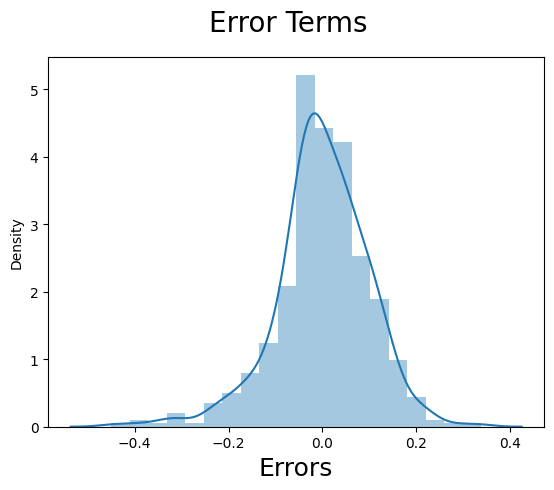

In [116]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0, 0.5, 'error')

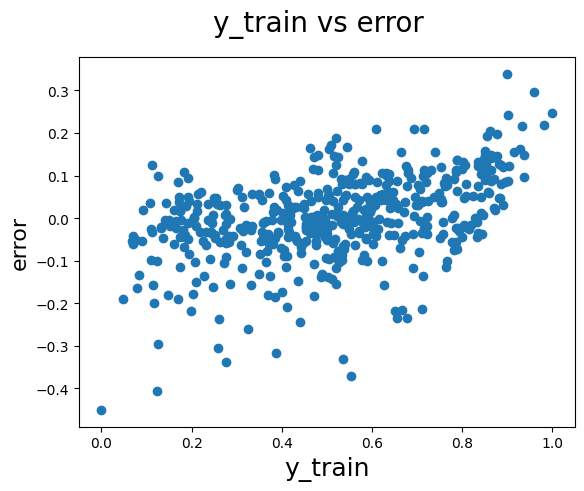

In [117]:
fig = plt.figure()
error =  y_train-y_train_cnt
plt.scatter(y_train, error)
fig.suptitle('y_train vs error', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('error', fontsize = 16)     

Text(0, 0.5, 'y_pred')

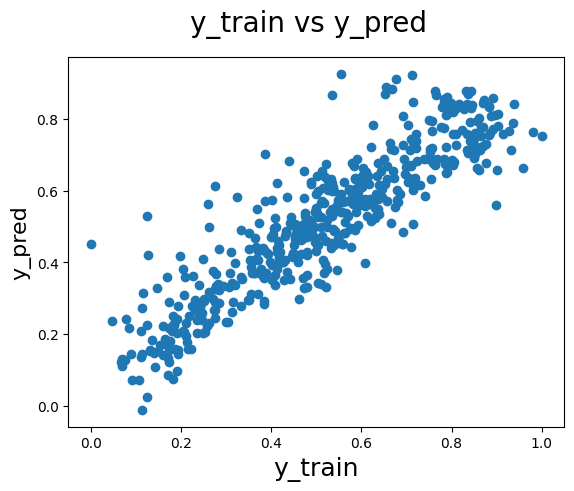

In [118]:
fig = plt.figure()
plt.scatter(y_train, y_train_cnt)
fig.suptitle('y_train vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

#### Applying the scaling on the test sets

In [119]:
X_train_lm.columns

Index(['const', 'season', 'yr', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'windspeed'],
      dtype='object')

In [120]:
df_test.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [121]:
df_train.columns

Index(['season', 'yr', 'holiday', 'weekday', 'workingday', 'weathersit',
       'temp', 'windspeed'],
      dtype='object')

In [122]:
num_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [123]:
df_test.describe()

season          yr        mnth     holiday     weekday  workingday  \
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000   
mean     0.485540    0.479452    0.497717    0.036530    0.503044    0.698630   
std      0.369821    0.500722    0.311080    0.188034    0.331402    0.459904   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.272727    0.000000    0.166667    0.000000   
50%      0.333333    0.000000    0.454545    0.000000    0.500000    1.000000   
75%      0.666667    1.000000    0.727273    0.000000    0.833333    1.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

       weathersit        temp       atemp         hum   windspeed         cnt  
count  219.000000  219.000000  219.000000  219.000000  219.000000  219.000000  
mean     0.187215    0.558941    0.532991    0.638508    0.313350    0.520592  
std      0.269422    0.233698    0.217888    0.148974    0.159947    0.218435  
min      0.000000    0.046591    0.025950    0.261915   -0.042808    0.048205  
25%      0.000000    0.354650    0.344751    0.527265    0.198517    0.377531  
50%      0.000000    0.558691    0.549198    0.627737    0.299459    0.524275  
75%      0.500000    0.759096    0.714132    0.743928    0.403048    0.672745  
max      1.000000    0.984424    0.980934    1.002146    0.807474    0.963300

#### Dividing into X_test and y_test

In [124]:
# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test = df_test;
y_test= X_test.pop('cnt')
X_test =X_test[X.columns] 

In [125]:
# Adding constant variable to test dataframe
X_test_m = sm.add_constant(X_test)

In [126]:
y_test.head()

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
Name: cnt, dtype: float64

In [127]:
y_pred_m4 = lr_3.predict(X_test_m)

Text(0, 0.5, 'y_pred')

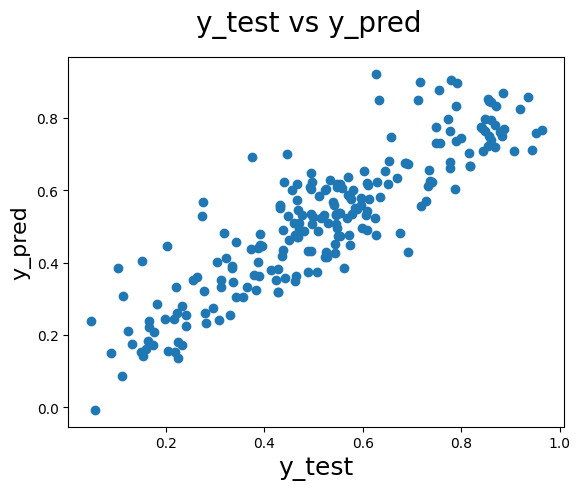

In [128]:

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

Text(0, 0.5, 'error')

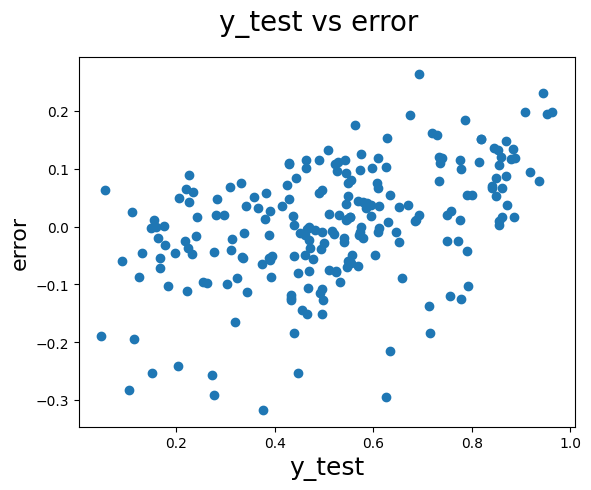

In [129]:
fig = plt.figure()
error =  y_test-y_pred_m4
plt.scatter(y_test, error)
fig.suptitle('y_test vs error', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('error', fontsize = 16)     

 ## Step 9 : R Squared Value during Test

In [130]:
from sklearn.metrics import r2_score

In [131]:
r2_score(y_true=y_test, y_pred=y_pred_m4)

0.7786089428454817

### Final Linear Equation of the Model using OLS :
$ cnt = 0.1291+ 0.1289 \times  season +0.2367 \times  yr -0.0724 \times holiday+ 0.0489	 \times weekday + 0.0197 \times workingday -0.1916	\times weathersit + 0.4642 \times temp  -0.1484	 \times windspeed $ $
		$


 ## Step 10 : Model using SK learn

In [132]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
print(lm.intercept_)
print(lm.coef_)
rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

0.1290720566452359
[ 0.12887751  0.23671541 -0.07236253  0.04890607  0.01972083 -0.19162673
  0.46415835 -0.14837607]


[('season', False, 2),
 ('yr', True, 1),
 ('holiday', False, 3),
 ('weekday', False, 4),
 ('workingday', False, 5),
 ('weathersit', True, 1),
 ('temp', True, 1),
 ('windspeed', True, 1)]

### Final Linear Equation of the Model using SK Learn :
$ cnt = 0.129072 + 0.128877 \times  season + 0.236715  \times  yr + 
 	-0.072362 \times holiday + 	0.048906 \times weekday + 	0.019720	\times workingday +
		-0.191626	\times weathersit + 0.464158 \times temp -0.148376	 \times windspeed $

##  Multiple Linear Regression Final Results :
####               R Squared Value during Training : 0.802
####               R Squared Value during Test: 0.778
